In [93]:
import ast
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import pdb

# studentid = os.path.basename(sys.modules[__name__].__file__)


#################################################
# Your personal methods can be here ...
#################################################


def log(question, output_df, other):
    print("--------------- {}----------------".format(question))
    if other is not None:
        print(question, other)
    if output_df is not None:
        print(output_df.head(5).to_string())




In [4]:
movies_df = pd.read_csv("movies.csv")
credits_df = pd.read_csv("credits.csv")
df1 = pd.merge(left=movies_df, right=credits_df,on=None, left_on='id', right_on='id')
df1


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,69,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,False,7.1,44,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de..."
1,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,76,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Shadows in Paradise,False,7.1,35,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de..."
2,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de..."
3,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,6,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",...,110,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.4,79,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de..."
4,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,11,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,...,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,False,8.1,6778,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,1589,tt0337631,en,The Boys from County Clare,Two feuding brothers and their respective Ceil...,...,91,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Boys from County Clare,False,6.5,3,"[{'cast_id': 6, 'character': 'Jimmy', 'credit_...","[{'credit_id': '560f3cc09251414779004a53', 'de..."
763,False,NaN,11000000,"[{'id': 18, 'name': 'Drama'}]",NaN,1590,tt0424908,en,Copying Beethoven,A fictionalised exploration of Beethoven's lif...,...,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Copying Beethoven,False,6.3,44,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de..."
764,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,1591,tt0161860,de,Nirgendwo in Afrika,A Jewish woman named Jettel Redlich flees Nazi...,...,140,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One family's tale of a homeland lost... and a ...,Nowhere in Africa,False,7.0,32,"[{'cast_id': 17, 'character': 'Jettel Redlich'...","[{'credit_id': '52fe4302c3a36847f803389b', 'de..."
765,False,NaN,30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,1592,tt0117381,en,Primal Fear,"An arrogant, high-powered attorney takes on th...",...,129,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Sooner or later, a man who wears two faces for...",Primal Fear,False,7.4,644,"[{'cast_id': 1, 'character': 'Martin Vail', 'c...","[{'credit_id': '52fe4302c3a36847f80339a1', 'de..."


In [5]:
df2 = df1[[ 'id', 'title', 'popularity', 'cast', 'crew', 'budget', 'genres', 'original_language', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'vote_average', 'vote_count']]
df2

,id,title,popularity,cast,crew,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,2,Ariel,3.860491,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",21/10/1988,0,69,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",7.1,44
1,3,Shadows in Paradise,2.292110,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",fi,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",16/10/1986,0,76,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.1,35
2,5,Four Rooms,9.026586,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,539
3,6,Judgment Night,5.538671,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",15/10/1993,12136938,110,"[{'iso_639_1': 'en', 'name': 'English'}]",6.4,79
4,11,Star Wars,42.149697,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",8.1,6778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1589,The Boys from County Clare,0.227122,"[{'cast_id': 6, 'character': 'Jimmy', 'credit_...","[{'credit_id': '560f3cc09251414779004a53', 'de...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,"[{'name': 'Isle of Man Film Commission', 'id':...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",12/09/2003,0,91,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,3
763,1590,Copying Beethoven,2.331416,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",6.3,44
764,1591,Nowhere in Africa,3.020270,"[{'cast_id': 17, 'character': 'Jettel Redlich'...","[{'credit_id': '52fe4302c3a36847f803389b', 'de...",0,"[{'id': 18, 'name': 'Drama'}]",de,"[{'name': 'MTM Cineteve', 'id': 740}, {'name':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",11/12/2001,0,140,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.0,32
765,1592,Primal Fear,10.326213,"[{'cast_id': 1, 'character': 'Martin Vail', 'c...","[{'credit_id': '52fe4302c3a36847f80339a1', 'de...",30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",en,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",3/04/1996,102616183,129,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.4,644


In [6]:
df3 = df2.set_index('id')
df3

,title,popularity,cast,crew,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
id,,,,,,,,,,,,,,,
2,Ariel,3.860491,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",21/10/1988,0,69,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",7.1,44
3,Shadows in Paradise,2.292110,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",fi,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",16/10/1986,0,76,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.1,35
5,Four Rooms,9.026586,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,539
6,Judgment Night,5.538671,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de...",0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",15/10/1993,12136938,110,"[{'iso_639_1': 'en', 'name': 'English'}]",6.4,79
11,Star Wars,42.149697,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",8.1,6778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,The Boys from County Clare,0.227122,"[{'cast_id': 6, 'character': 'Jimmy', 'credit_...","[{'credit_id': '560f3cc09251414779004a53', 'de...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,"[{'name': 'Isle of Man Film Commission', 'id':...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",12/09/2003,0,91,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,3
1590,Copying Beethoven,2.331416,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",6.3,44
1591,Nowhere in Africa,3.020270,"[{'cast_id': 17, 'character': 'Jettel Redlich'...","[{'credit_id': '52fe4302c3a36847f803389b', 'de...",0,"[{'id': 18, 'name': 'Drama'}]",de,"[{'name': 'MTM Cineteve', 'id': 740}, {'name':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",11/12/2001,0,140,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.0,32


In [7]:
df4 = df3[df3.budget!=0]
df4

,title,popularity,cast,crew,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
id,,,,,,,,,,,,,,,
5,Four Rooms,9.026586,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,539
11,Star Wars,42.149697,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",8.1,6778
12,Finding Nemo,25.497794,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",7.6,6292
13,Forrest Gump,48.307194,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",8.2,8147
14,American Beauty,20.726578,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",15000000,"[{'id': 18, 'name': 'Drama'}]",en,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",7.9,3438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,What's Eating Gilbert Grape,10.391900,"[{'cast_id': 13, 'character': 'Gilbert Grape',...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",7.5,943
1588,Bring It On,6.402888,"[{'cast_id': 1, 'character': 'Torrance Shipman...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",28000000,"[{'id': 35, 'name': 'Comedy'}]",en,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",5.8,574
1590,Copying Beethoven,2.331416,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",6.3,44


In [8]:
df5 = df4.copy()
df5['success_impact'] = (df5['revenue'] - df5['budget'])/df5['budget']
df5

,title,popularity,cast,crew,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,success_impact
id,,,,,,,,,,,,,,,,
5,Four Rooms,9.026586,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,539,0.075000
11,Star Wars,42.149697,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",8.1,6778,69.490728
12,Finding Nemo,25.497794,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",7.6,6292,9.003570
13,Forrest Gump,48.307194,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",8.2,8147,11.326280
14,American Beauty,20.726578,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",15000000,"[{'id': 18, 'name': 'Drama'}]",en,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",7.9,3438,22.753107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,What's Eating Gilbert Grape,10.391900,"[{'cast_id': 13, 'character': 'Gilbert Grape',...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",7.5,943,-0.087930
1588,Bring It On,6.402888,"[{'cast_id': 1, 'character': 'Torrance Shipman...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",28000000,"[{'id': 35, 'name': 'Comedy'}]",en,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",5.8,574,2.230355
1590,Copying Beethoven,2.331416,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",6.3,44,-1.000000


In [9]:
df6 = df5.copy()
df6 = df6.astype({'popularity':'float'})
df6['popularity']= (df6['popularity']-df6['popularity'].min())/(df6['popularity'].max()-df6['popularity'].min())*100
df6['popularity'].dtype

dtype('float64')

In [61]:

df7 = df6.copy()
df7 = df7.astype({'popularity':'int16'})


In [79]:
df8 = df7.copy()
# df8 = df8['cast'][5][1:-1]
# js_8 = ast.literal_eval(df8)

## 带[]转list
## 遍历
## 再cast转dict
## 排序
# print(df8)
# type(js_8)
# print(df8)
df8
# js_81 = sorted(js_81['about-us'], key=lambda x: int(x['order']))
# for i in df8:
#     print(i)

,title,popularity,cast,crew,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,success_impact
id,,,,,,,,,,,,,,,,
5,Four Rooms,5,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,539,0.075000
11,Star Wars,29,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",8.1,6778,69.490728
12,Finding Nemo,17,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",7.6,6292,9.003570
13,Forrest Gump,33,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",8.2,8147,11.326280
14,American Beauty,14,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",15000000,"[{'id': 18, 'name': 'Drama'}]",en,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",7.9,3438,22.753107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,What's Eating Gilbert Grape,6,"[{'cast_id': 13, 'character': 'Gilbert Grape',...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",7.5,943,-0.087930
1588,Bring It On,4,"[{'cast_id': 1, 'character': 'Torrance Shipman...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",28000000,"[{'id': 35, 'name': 'Comedy'}]",en,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",5.8,574,2.230355
1590,Copying Beethoven,1,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",11000000,"[{'id': 18, 'name': 'Drama'}]",en,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",6.3,44,-1.000000


In [108]:
df8 = df7.copy()
for idx, row in df8.iterrows():
    cast_data = row['cast']
    # print(row['cast'])
    cast_lst = ast.literal_eval(cast_data)
    total_cast_lst = []
    for j in cast_lst:
        # convert to dict
        single_cast_dict = ast.literal_eval(str(j))
        total_cast_lst.append(single_cast_dict['character'])
    # sort by character
    total_cast_lst = sorted(total_cast_lst)
    total_cast_str = ','.join([str(elem) for elem in total_cast_lst]) 
    row['cast'] = total_cast_str
    pdb.set_trace()
    # total_cast_lst = sorted(total_cast_lst, key=lambda x: x['character'], reverse=False)


# df8 = df8['cast'][5]
# js_8 = ast.literal_eval(df8)


> <ipython-input-108-a289f1aa00b0>(2)<module>()
-> for idx, row in df8.iterrows():
Angela,Athena,Betty,Chester Rush,Corpse,Diana,Elspeth,Eva,Hooker,Jezebel,Juancho,Kiva,Leo,Long Hair Yuppy Scum,Man,Margaret,Norman,Raven,Sam the Bellhop,Sarah,Siegfried,TV Dancing Girl,Ted the Bellhop,Wife
Angela,Athena,Betty,Chester Rush,Corpse,Diana,Elspeth,Eva,Hooker,Jezebel,Juancho,Kiva,Leo,Long Hair Yuppy Scum,Man,Margaret,Norman,Raven,Sam the Bellhop,Sarah,Siegfried,TV Dancing Girl,Ted the Bellhop,Wife


BdbQuit: 

In [136]:
# final q8

df8 = df7.copy()
for i, row in df8.iterrows():
    cast_data = row['cast']
    cast_lst = ast.literal_eval(cast_data)
    total_cast_lst = []
    for j in cast_lst:
        # convert to dict
        single_cast_dict = ast.literal_eval(str(j))
        total_cast_lst.append(single_cast_dict['character'])
    # sort by character
    total_cast_lst = sorted(total_cast_lst)
    total_cast_str = ','.join([str(elem) for elem in total_cast_lst]) 
    df8['cast'][i] = total_cast_str

df8


,title,popularity,cast,crew,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,success_impact
id,,,,,,,,,,,,,,,,


In [140]:
# df8.loc[df8['cast'].isin('Null')]
df8['cast'][15]

"(uncredited),Adolf Hitler (uncredited),Bertha Anderson,Best Man at Wedding (uncredited),Big Governess (uncredited),Boss Printer (uncredited),Car-Driver (uncredited),Charles Foster Kane,Charles Foster Kane III,Chorus Master (uncredited),City Editor (uncredited),City Room Employee (uncredited),Civic Leader (uncredited),Civic Leader (uncredited),Copy Boy (uncredited),Copy Boy (uncredited),Copy Boy Delivering Message in Chicago Hotel Room (uncredited),Dancer (uncredited),Dancer (uncredited),Dancer (uncredited),Dancer (uncredited),Dancer (uncredited),Dr. Corey (uncredited),Emily Norton Kane,Entertainer\t (uncredited),Ethel (uncredited),Expressman (uncredited),Extra (uncredited),Fish Driver (uncredited),French Maid (uncredited),Georgia (uncredited),Gino (uncredited),Guest (uncredited),Herbert Carter,Hermann Goring (uncredited),Hireling (uncredited),Hireling (uncredited),House Maid (uncredited),Inquirer Reporter (uncredited),Interviewer,Jedediah Leland,Jerry Thompson/Narrator,Jim Kane,Jim W.

In [160]:
# Q9

df9 = df8[['title', 'cast']]
cast_count_dict = {}
for idx, row in df9.iterrows():
    cast_lst = (row['cast']).split(",")
    # remove dumplicate
    cast_lst = list(dict.fromkeys(cast_lst))
    cast_num = len(cast_lst)
    cast_count_dict[idx] = cast_num

top10_film_id = [key for key in sorted(cast_count_dict, key=cast_count_dict.get, reverse=True)[:10]]
top_10_film_lst = []

for f_id in top10_film_id:
    top_10_film_lst.append(df9['title'][f_id])

# print(top_10_film_lst)

# pdb.set_trace()
# df9


['GoodFellas', 'Titanic', 'Spider-Man 3', 'Gone with the Wind', 'Contact', 'Catch Me If You Can', 'Citizen Kane', 'Pearl Harbor', 'Resident Evil: Apocalypse', 'The Fifth Element']


In [167]:
# Q10
df10 = df8.copy()
df10['release_date']=pd.to_datetime(df10.release_date)
df10 = df10.sort_values(by='release_date', ascending=False)
df10

,title,popularity,cast,crew,budget,genres,original_language,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,success_impact
id,,,,,,,,,,,,,,,,
767,Harry Potter and the Half-Blood Prince,13,"Albus Dumbledore,Alecto Carrow,Amycus Carrow,A...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...",250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2009-07-07,933959197,153,"[{'iso_639_1': 'en', 'name': 'English'}]",7.4,5435,2.735837
534,Terminator Salvation,11,"Barnes,Blair Williams,General Ashdown,John Con...","[{'credit_id': '52fe424ec3a36847f8013ffd', 'de...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2009-05-20,371353001,115,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",5.9,2496,0.856765
1266,Street Kings,8,"Assistant D.A.,Black Woman,Boss Kim,Captain Ja...","[{'credit_id': '52fe42ecc3a36847f802cfa3', 'de...",20000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,"[{'name': 'Fox Searchlight Pictures', 'id': 43...","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-10-04,65569869,109,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.3,369,2.278493
440,Aliens vs Predator: Requiem,7,"Alien,Buddy,Carrie,Col. Stevens,Curtis,Dale,Da...","[{'credit_id': '53957f680e0a266db40063f9', 'de...",40000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",en,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-12-25,41797066,94,"[{'iso_639_1': 'en', 'name': 'English'}]",4.9,758,0.044927
1534,Pathfinder,7,"Blackwing,Elder #1,Elder #2,Elder #3,Flashback...","[{'credit_id': '52fe42fbc3a36847f8031699', 'de...",45000000,"[{'id': 12, 'name': 'Adventure'}]",en,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-11-01,30822861,99,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",5.4,173,-0.315048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,The Gold Rush,3,"Barman (uncredited),Big Jim McKay,Black Larsen...","[{'credit_id': '52fe4294c3a36847f8029977', 'de...",923000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",en,"[{'name': 'Charles Chaplin Productions', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1925-06-25,2500000,95,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,308,1.708559
1405,Greed,4,"August Sieppe (uncredited),Balloon Vendor (unc...","[{'credit_id': '52fe42f3c3a36847f802f33d', 'de...",546883,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",en,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",1924-04-12,0,140,"[{'iso_639_1': 'en', 'name': 'English'}]",7.5,25,-1.000000
669,Nanook of the North,1,"Nanook,Nanook's son,Nanook's son,Nanook's wife...","[{'credit_id': '52fe4267c3a36847f801bcd5', 'de...",53000,"[{'id': 99, 'name': 'Documentary'}]",en,"[{'name': 'Révillon Frères', 'id': 397}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1922-11-06,0,79,"[{'iso_639_1': 'en', 'name': 'English'}]",7.2,50,-1.000000


([<matplotlib.patches.Wedge at 0x7f71a1701da0>,
 [Text(-0.2871923492569441, 1.0618477077850088, 'Adventure'),
  Text(-0.6461783484820637, 0.8901985969169985, 'Family'),
  Text(-0.8456181220163193, 0.7035126094943811, 'Fantasy'),
  Text(-1.0651922711458433, 0.27452764066876806, 'Action'),
  Text(-1.0789508420044285, -0.21416134230512976, 'Science Fiction'),
  Text(-0.8394937493299759, -0.7108095700227309, 'Thriller'),
  Text(-0.3009619611613124, -1.0580273616187519, 'Crime'),
  Text(0.6129824463416222, -0.9133742499529097, 'Drama'),
  Text(1.0686686015835818, -0.26066725914351374, 'Horror'),
  Text(1.0999941987605586, -0.003572491164007709, 'Mystery'),
  Text(1.0861009422399859, 0.17431220056385857, 'Animation'),
  Text(0.9692349223669321, 0.5201765712374669, 'Comedy'),
  Text(0.6267545740800854, 0.9039793713739772, 'Romance'),
  Text(0.3779623430165096, 1.0330268473091444, 'War'),
  Text(0.21766436749632354, 1.0782496107685018, 'History'),
  Text(0.0690220890725251, 1.09783238758021, '

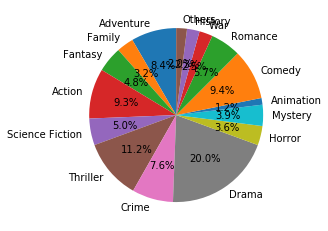

In [193]:
# https://chrisalbon.com/python/data_visualization/matplotlib_pie_chart/

# Q11
df11=df10.copy()
for i, row in df11.iterrows():
    genre_data = row['genres']
    genre_lst = ast.literal_eval(genre_data)
    total_genre_lst = []
    for j in genre_lst:
        # convert to dict
        single_genre_dict = ast.literal_eval(str(j))
        total_genre_lst.append(single_genre_dict['name'])
    # sort by character
    total_genre_lst = sorted(total_genre_lst)
    df11['genres'][i] = total_genre_lst

## calc
film_num = 0
genre_dict = {}
for i, row in df11.iterrows():
    genre_lst = row['genres']
    film_num += len(genre_lst)
    for g in genre_lst:
        if not g in genre_dict:
            genre_dict[g] = 1
        else:
            genre_dict[g] += 1
# combine least 4 values
least_4_vals = 0
for _ in range(4):
    min_key = min(genre_dict.keys(), key= lambda x:genre_dict[x])
    least_4_vals += genre_dict[min_key]
    del genre_dict[min_key]
genre_dict['Others'] = least_4_vals

# convert to dataframe and plot out        
pd_out = pd.DataFrame(genre_dict.items(), columns=['genre','count'])
plt.pie(pd_out['count'], labels=pd_out['genre'], startangle=90,autopct='%1.1f%%',)
# pdb.set_trace()
### plot

# plt.pie(df11['genres'])

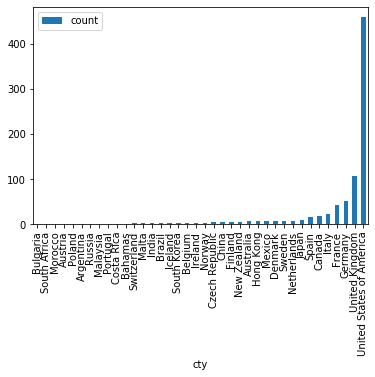

In [200]:

# Q12
df12=df10.copy()
for i, row in df12.iterrows():
    p_cty_data = row['production_countries']
    p_cty_lst = ast.literal_eval(p_cty_data)
    total_cty_lst = []
    for j in p_cty_lst:
        # convert to dict
        single_cty_dict = ast.literal_eval(str(j))
        total_cty_lst.append(single_cty_dict['name'])
    # sort by character
    total_cty_lst = sorted(total_cty_lst)
    df12['production_countries'][i] = total_cty_lst


## calc
cty_num = 0
cty_dict = {}
for i, row in df12.iterrows():
    cty_lst = row['production_countries']
    cty_num += len(cty_lst)
    for g in cty_lst:
        if not g in cty_dict:
            cty_dict[g] = 1
        else:
            cty_dict[g] += 1
# sort by value
cty_dict_sorted = {k: v for k, v in sorted(cty_dict.items(), key=lambda i: i[1])}

# # convert to dataframe and plot out        
pd_out = pd.DataFrame(cty_dict_sorted.items(), columns=['cty','count'])
pd_out.plot.bar(x='cty', y='count')

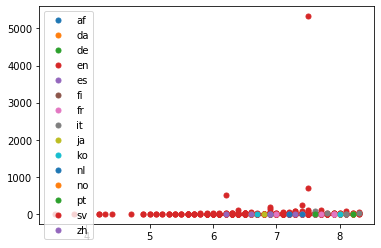

In [209]:
# ref https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category
## Q13

df13 = df10.copy()
df13_1 = df13[['original_language', 'vote_average','success_impact']]

groups = df13_1.groupby('original_language')
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.vote_average, group.success_impact, marker='o', linestyle='', ms=5, label=name)
ax.legend()

# plt.show()
# df13_1.plot.scatter(x='vote_average', y='success_impact', label='original_language')

In [5]:
def question_1(movies, credits):
    """
    :param movies: the path for the movie.csv file
    :param credits: the path for the credits.csv file
    :return: df1
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    movies_df = pd.read_csv(movies)
    credits_df = pd.read_csv(credits)
    df1 = pd.merge(left=movies_df, right=credits_df,on=None, left_on='id', right_on='id')
    
    #################################################

    # log("QUESTION 1", output_df=df1, other=df1.shape)
    return df1

In [6]:



def question_2(df1):
    """
    :param df1: the dataframe created in question 1
    :return: df2
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    df2
    #################################################

    log("QUESTION 2", output_df=df2, other=(len(df2.columns), sorted(df2.columns)))
    return df2


def question_3(df2):
    """
    :param df2: the dataframe created in question 2
    :return: df3
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    #################################################

    log("QUESTION 3", output_df=df3, other=df3.index.name)
    return df3


def question_4(df3):
    """
    :param df3: the dataframe created in question 3
    :return: df4
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    #################################################

    log("QUESTION 4", output_df=df4, other=(df4['budget'].min(), df4['budget'].max(), df4['budget'].mean()))
    return df4


def question_5(df4):
    """
    :param df4: the dataframe created in question 4
    :return: df5
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    #################################################

    log("QUESTION 5", output_df=df5,
        other=(df5['success_impact'].min(), df5['success_impact'].max(), df5['success_impact'].mean()))
    return df5


def question_6(df5):
    """
    :param df5: the dataframe created in question 5
    :return: df6
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    #################################################

    log("QUESTION 6", output_df=df6, other=(df6['popularity'].min(), df6['popularity'].max(), df6['popularity'].mean()))
    return df6


def question_7(df6):
    """
    :param df6: the dataframe created in question 6
    :return: df7
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    #################################################

    log("QUESTION 7", output_df=df7, other=df7['popularity'].dtype)
    return df7


def question_8(df7):
    """
    :param df7: the dataframe created in question 7
    :return: df8
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    #################################################

    log("QUESTION 8", output_df=df8, other=df8["cast"].head(10).values)
    return df8


def question_9(df8):
    """
    :param df9: the dataframe created in question 8
    :return: movies
            Data Type: List of strings (movie titles)
            Please read the assignment specs to know how to create the output
    """

    #################################################
    # Your code goes here ...
    #################################################

    log("QUESTION 9", output_df=None, other=movies)
    return movies


def question_10(df8):
    """
    :param df8: the dataframe created in question 8
    :return: df10
            Data Type: Dataframe
            Please read the assignment specs to know how to create the output dataframe
    """

    #################################################
    # Your code goes here ...
    #################################################

    log("QUESTION 10", output_df=df10, other=df10["release_date"].head(5).to_string().replace("\n", " "))
    return df10


def question_11(df10):
    """
    :param df10: the dataframe created in question 10
    :return: nothing, but saves the figure on the disk
    """

    #################################################
    # Your code goes here ...
    #################################################

    plt.savefig("{}-Q11.png".format(studentid))


def question_12(df10):
    """
    :param df10: the dataframe created in question 10
    :return: nothing, but saves the figure on the disk
    """

    #################################################
    # Your code goes here ...
    #################################################

    plt.savefig("{}-Q12.png".format(studentid))


def question_13(df10):
    """
    :param df10: the dataframe created in question 10
    :return: nothing, but saves the figure on the disk
    """

    #################################################
    # Your code goes here ...
    #################################################

    plt.savefig("{}-Q13.png".format(studentid))





In [7]:
df1 = question_1("movies.csv", "credits.csv")

NameError: name 'df1' is not defined

In [ ]:
if __name__ == "__main__":
    df1 = question_1("movies.csv", "credits.csv")
    df2 = question_2(df1)
    df3 = question_3(df2)
    df4 = question_4(df3)
    df5 = question_5(df4)
    df6 = question_6(df5)
    df7 = question_7(df6)
    df8 = question_8(df7)
    movies = question_9(df8)
    df10 = question_10(df8)
    question_11(df10)
    question_12(df10)
    question_13(df10)